In [1]:
import numpy as np
from engine import Heatmap, Noise, Field, colors, gradient,CombineNoises
from noises import smooth, heat
from utilities import vectorize, cells

/home/ventus/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


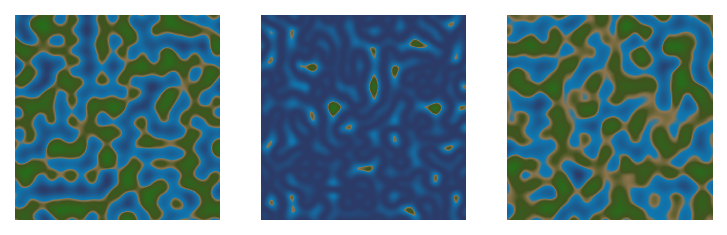

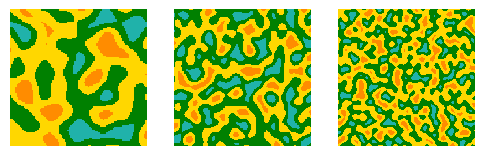

In [2]:
# Heatmap examples
Heatmap(smooth(10, 100), smooth(10, 100)**2, smooth(10, 100) + smooth(10, 100) + smooth(10, 100), scale = 1.5)
Heatmap(smooth(5, 20), smooth(10, 20), smooth(15, 20), cmap = colors(["darkorange", "gold", "green", "lightseagreen"]))

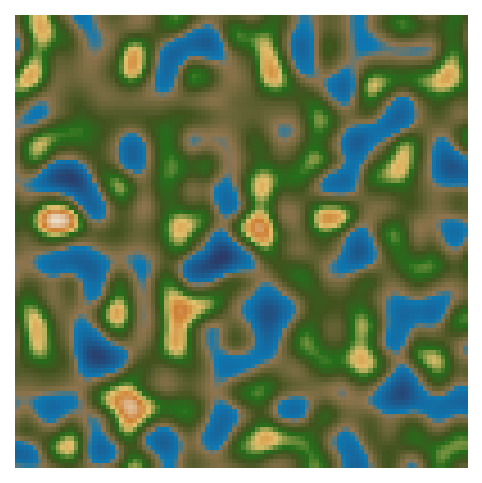

interactive(children=(IntSlider(value=25, description='distance', max=50, min=1, step=3), IntSlider(value=25, …

In [3]:
# Noises combination
weights = [0.2,0.3,0.4,0.7,0.8,0.9]
Heatmap(CombineNoises(weights,[smooth(10,10) for _ in range(len(weights))]), scale = 1.5,cmap = "mountains")

def __weightSum_test(distance, resolution):
    return CombineNoises(weights,[smooth(distance,resolution) for _ in range(len(weights))])

# Look at distance 3 
Noise(__weightSum_test, distance = (1, 50, 3), resolution = (1, 50, 1), cbar = True, cmap="gray", vmin=0, vmax=1) 

In [4]:
# Simplest noise rendering
Noise(smooth, distance = 10, resolution = 10)

# Restricted (start, end, step) and cbar is passed to heatmap:
Noise(smooth, distance = (1, 50, 3), resolution = (1, 50, 1), cbar = True)

interactive(children=(IntSlider(value=10, description='distance', max=30, min=-10), IntSlider(value=10, descri…

interactive(children=(IntSlider(value=25, description='distance', max=50, min=1, step=3), IntSlider(value=25, …

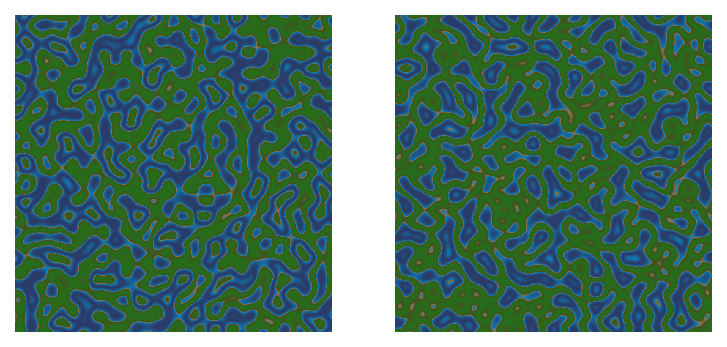

In [5]:
# Voodoo
Heatmap(np.sin(smooth(15, 50) * 2*np.pi), np.cos(smooth(15, 50) * 2*np.pi), scale = 1.5)

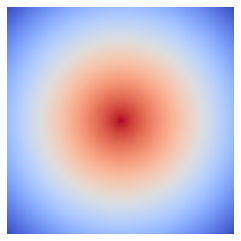

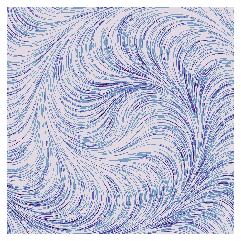

In [14]:

M = heat(500, 20, 250, 250)
Heatmap(M, scale = 0.75, cmap = 'coolwarm')
Field(M, scale = 0.75, cmap = 'twilight', alpha = 0.8, time = 50)